In [1]:
# Import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams['figure.figsize'] = (20, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams.update({'font.size': 16})

In [2]:
# Import data

filename = "./recording_radar_newt-gingrich_2017_06_15_19_44_15_1497570240_90dB_3792000000Hz_10000000sps_.cfile"

data=np.fromfile(filename,dtype=np.complex64,count=int(50e6))

beg_slice = int(1.73e7)
end_slice = int(2.12e7)

data = data[beg_slice:end_slice] # take data only from single set of pulses to speed up processing

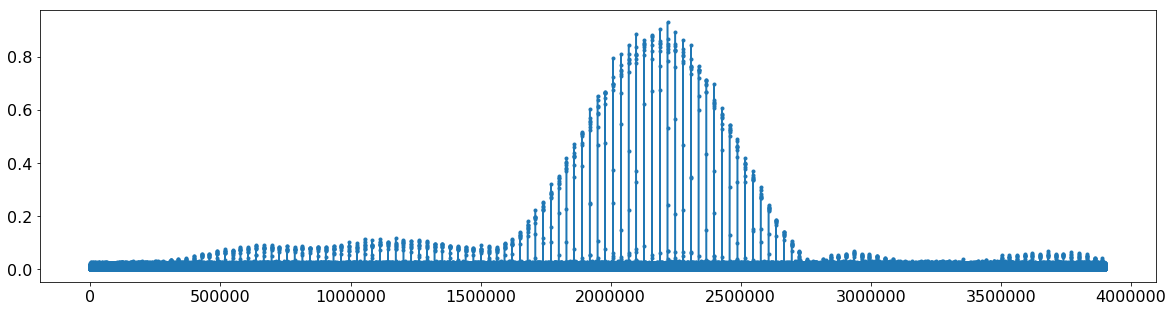

In [3]:
# Plot original data

plt.plot(np.abs(data),".-"); #plot data as is, no peak detection

Following code adapted from: http://tsaith.github.io/detect-peaks-with-cfar-algorithm.html

In [4]:
# Detect peaks with cell-averaging CFAR algorithm.

def detect_peaks(x, num_train, num_guard, rate_fa):
      
   # num_train: Number of training cells.
   # num_guard: Number of guard cells.
   # rate_fa: False alarm rate. 
    
    
    num_cells = int(x.size)
    num_train_half = int(round(num_train / 2))
    num_guard_half = int(round(num_guard / 2))
    num_side = int(num_train_half) + int(num_guard_half)
 
    alpha = num_train*((rate_fa**(-1.0/num_train)) - 1) # threshold factor
    
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
                    
        sum1 = np.sum(x[i-num_side:i+num_side+1]) #power of larger window 
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) #power of smaller window 
        p_noise = (sum1 - sum2) / num_train #average of noise power surrounding CUT  
        threshold = alpha * p_noise
       
        
        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=np.int)
    return peak_idx

In [5]:
# Detect peaks

y = np.abs(data)
x = np.arange(y.size)

peak_idx = detect_peaks(y, num_train=100, num_guard=20, rate_fa=1e-3)

width = np.argmax(x[peak_idx]) - np.argmin(x[peak_idx])
print ("width = ", width)

('width = ', 625)


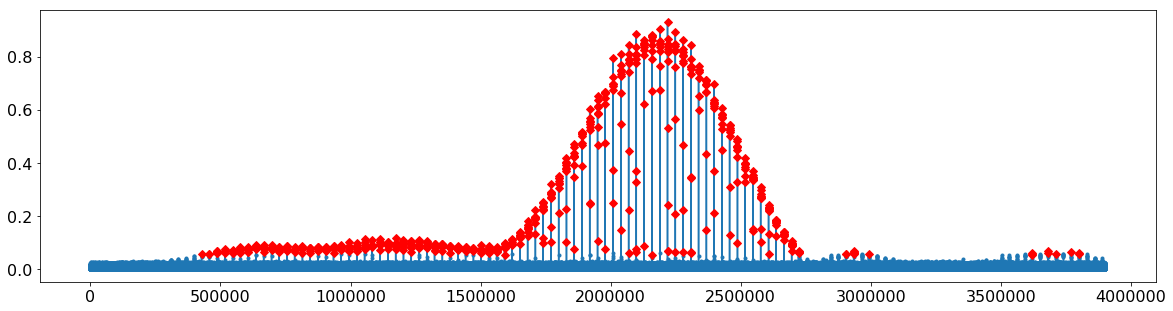

In [6]:
# Plot peaks amongst original data

plt.plot(y,".-");
plt.plot(x[peak_idx], y[peak_idx], 'rD');